# Week 6
## 1. Linear Regression

In [1]:
#import important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm

#import data from csv file
df=pd.read_csv('Lecture6_Geologic_DataSet.csv')

#visually look at the data
df.head()

,Porosity (%),Matrix Perm (nd),Acoustic impedance (kg/m2s*10^6),Brittleness Ratio,TOC (%),Vitrinite Reflectance (%),Aroot(K)
0,8.456,292,3.080,97.680,4.64,1.848,48.306469
1,8.666,353,3.542,55.404,3.56,1.504,41.300912
2,9.814,259,4.411,87.360,3.56,2.176,49.688356
3,12.369,675,2.893,47.772,4.32,1.504,59.132694
4,12.264,457,3.498,13.128,6.04,1.520,39.503121


In [2]:
#Check the dataset dimensions
df.shape

(200, 7)

In [3]:
#check variables types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Porosity (%)                      200 non-null    float64
 1   Matrix Perm (nd)                  200 non-null    int64  
 2   Acoustic impedance (kg/m2s*10^6)  200 non-null    float64
 3   Brittleness Ratio                 200 non-null    float64
 4   TOC (%)                           200 non-null    float64
 5   Vitrinite Reflectance (%)         200 non-null    float64
 6   Aroot(K)                          200 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 11.1 KB


In [4]:
#summary statistics for the dataset
SummaryResults=df.describe(include='all')
SummaryResults[['Porosity (%)','Aroot(K)']]

,Porosity (%),Aroot(K)
count,200.000000,200.000000
mean,10.493805,50.000000
std,2.079824,11.505310
min,4.585000,24.437856
25%,9.038750,41.961030
50%,10.549000,49.692285
75%,12.181750,58.986667
max,16.485000,77.270733


Analytics Question:
Can the porosity be used to predict the 𝐴√𝑘 ?  

Let's use simple linear regression model (𝐴√𝑘 DV, porosity IV, both continous).

In [5]:
#X: porosity is the independent variable
X = df['Porosity (%)']

#Y: 𝐴√𝑘 is the dependent variable
Y = df['Aroot(K)']

#Add an intercept/constant to our model
X =sm.add_constant(X)

#Use linear regression model
lr_sm=sm.OLS(Y,X).fit()  #ordinary least squares
lr_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Aroot(K)   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     572.1
Date:                Sun, 23 Jan 2022   Prob (F-statistic):           2.62e-60
Time:                        19:12:53   Log-Likelihood:                -636.02
No. Observations:                 200   AIC:                             1276.
Df Residuals:                     198   BIC:                             1283.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0341      2.132     -0.016      0.987      -4.239       4.171
Porosity (%)     4.7680      0.199     23.918      0.000       4.375       5.161
==============================================================================
Omnibus:                       31.436   Durbin-Watson:                   1.931
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.794
Skew:                          -1.049   Prob(JB):                     1.39e-09
Kurtosis:                       3.700   Cond. No.                         55.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

__Is the variables are statistically significant, is there an association between porosity and the Aroot(k) ?__
- p<0.05, we will reject the null hypothesis, there is a statistically significant association between porosity and the Aroot(K).

In [6]:
#Calculate the Residual Standard Error
np.sqrt(lr_sm.scale)

5.84861985785983

- The RSE indicates the amount the DV will deviate from the true regression line. In our case, the RSE is 5.84.  
- The R^2 value indicates that about 74% of the variation in 𝐴√𝑘 is explained by the porosity (predictor). The closer to 100 the better.

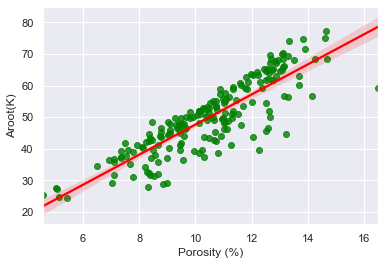

In [7]:
#let's plot the regression model
sns.set(color_codes=True)
ax=sns.regplot(x='Porosity (%)',
               y='Aroot(K)',
               data=df,scatter_kws={'color':'green'},
               line_kws={'color':'red'})

So far what we have done?
- we created a linear statistical model using the __ENITRE__ dataset, to check the relationship between porosity and Aroot(K).
- we check statistically if there is a correlation.
- we looked at some of the metrics R2

Can I use the model to predict Aroot(k) give a specific porosity ?
<br>Yes!<br>

In [8]:
#at porosity of 10.8 what is the Aroot(k) ?
Arootk_calcualted=(4.7680*10.8)-0.0341
Arootk_calcualted

51.4603

In [9]:
df_lr=df.copy()

#Calculate the predicted values
df_lr['Y_Aroot(K)']=lr_sm.predict(X)

In [10]:
#Calculate mean absolute percentage error
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

MAPE(df['Aroot(K)'],df_lr['Y_Aroot(K)'])

9.999832588253701

Linear regression is always a good starting point because it is low computional cost and easy to implement. <br>
If we want to use in the real world we will need to do training and testing. This is to evaluate the model on an unseen dataset (testing).

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
#Evaluate the model prediction accuracy
#Split data to training and testing #RANDOMLY 
X_train, X_test, Y_train, Y_test=train_test_split(X,Y, test_size=0.20, random_state=224)  #80/20 or 70/30 depends on how much data you want to distribute and sample size. After building the model you can go back and try different split.
#we set a random seed to reproduce results of the random sampling

In [12]:
#Create a linear regression model lr
lr=LinearRegression()
#fit and train the lr model
lr.fit(X_train,Y_train)
#predict the Aroot(k) from training data
Y_train_predict=lr.predict(X_train)
#predict the Aroot(k) from testing data
Y_test_predict=lr.predict(X_test)

We want to make sure that the model is not overfitting. We dont want to have a too perfectly fit model, it wont be generlaized for other new dataset and we will need to check this. One way is to look at the RMSE on the training and testing datasets. We hope they are very similar that means the model is not overfitted on the training data. <br>

Root Mean Square Error (RMSE) can be a good metric because RMSE is in same units as the output

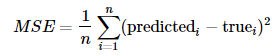

In [13]:
#Compare RMSE between train and test
print("RMSE for Training Data predictions: ", np.sqrt(metrics.mean_squared_error(Y_train,Y_train_predict)))
print("RMSE for Testing Data predictions: ", np.sqrt(metrics.mean_squared_error(Y_test,Y_test_predict)))

RMSE for Training Data predictions:  5.739380108667124
RMSE for Testing Data predictions:  6.162659237109064


We conclude that our model is not overfitting because the two RMSE are close/similar.

Let's investigate the correlation between actual and predicted in the testing dataset

p-value:  9.440785948574536e-13
Correlation:  0.8616828032765147


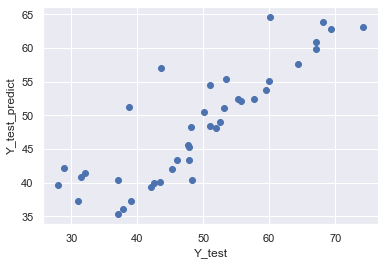

In [14]:
from scipy.stats import pearsonr
stat, pvalue= pearsonr(Y_test,Y_test_predict)
print ("p-value: ", pvalue)
print ("Correlation: ", stat)
plt.scatter(x=Y_test,y=Y_test_predict)
plt.xlabel('Y_test')
plt.ylabel('Y_test_predict')

plt.show()

We are seeing a some good correlation but the model can be better.

### 1.1 Linear Regression: Diagnostics
To check if the model has any problems and how the model is performing.
Methods:
- Plotting Residuals vs. Fitted Values
- Normal Q-Q plot
- sqrt(abs(Standardized residuals)) vs. Fitted Values
- Studentized residuals vs Leverage to see if we have any bias.

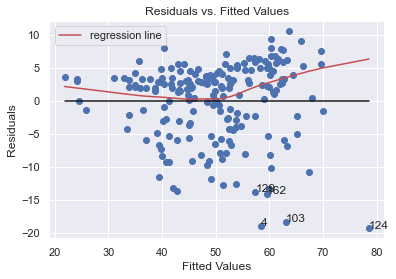

In [15]:
# Plotting Residuals vs. Fitted Values
from statsmodels.nonparametric.smoothers_lowess import lowess

residuals=lr_sm.resid
fitted= lr_sm.fittedvalues
smoothed=lowess(residuals,fitted)
top5=abs(residuals).sort_values(ascending=False)[:5]

fig, ax = plt.subplots()
ax.scatter(fitted,residuals)
ax.plot(smoothed[:,0],smoothed[:,1],label="regression line",color='r')
ax.set_ylabel('Residuals')
ax.set_xlabel('Fitted Values')
ax.set_title('Residuals vs. Fitted Values')
ax.plot([min(fitted),max(fitted)],[0,0],color='k')
ax.legend()
for i in top5.index:
    ax.annotate(i,xy=(fitted[i], residuals[i]))
plt.show()

We are hoping to have the scattered points (or the regression line) are close to the zero line.<br>
Also we are looking for a pattern or shape. If we have a pattern that is a problem.<br>
Also look for values above and below the line. For example as we go for larger values the residuals fall of below the regression line, then we have bias on the larger values.

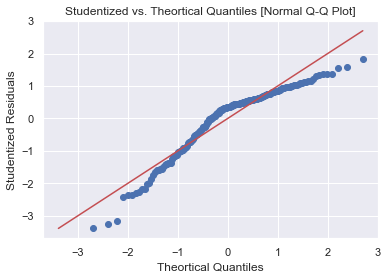

In [16]:
# Plotting Normal Q-Q plot
from scipy import stats
std_residuals=pd.Series(lr_sm.get_influence().resid_studentized_internal) #In statistics, a studentized residual is the quotient resulting from the division of a residual by an estimate of its standard deviation.
std_residuals.index=lr_sm.resid.index
sorted_std_residuals=std_residuals.sort_values(ascending=True)
df_sorted=pd.DataFrame(sorted_std_residuals)
df_sorted.columns=['sorted_residuals']
df_sorted['theortical_quantiles']=stats.probplot(df_sorted['sorted_residuals'], dist='norm', fit=False)[0]

fig, ax =plt.subplots()
ax.scatter(df_sorted['theortical_quantiles'],df_sorted['sorted_residuals'])
ax.set_ylabel('Studentized Residuals')
ax.set_xlabel('Theortical Quantiles')
ax.set_title('Studentized vs. Theortical Quantiles [Normal Q-Q Plot]')

ax.plot([np.min([df_sorted['theortical_quantiles'],df_sorted['sorted_residuals']]),
        np.max([df_sorted['theortical_quantiles'],df_sorted['sorted_residuals']])]
        ,[np.min([df_sorted['theortical_quantiles'],df_sorted['sorted_residuals']]),
        np.max([df_sorted['theortical_quantiles'],df_sorted['sorted_residuals']])],color='r')
plt.show()

Evaluate the normality of the errors.<br>
Errors should be normally distributed.<br>
<br>
For our model we see some departure from normality so we might have some problems at the higher values and lower values.

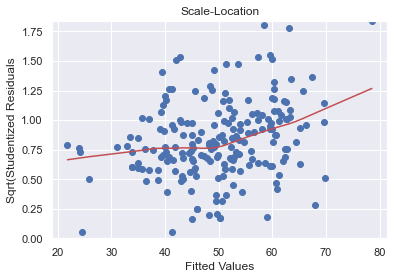

In [17]:
# Plotting sqrt(abs(Studentized residuals)) vs. Fitted Values
# a studentized residual is the quotient resulting from the division of a residual by an estimate of its standard deviation

std_residuals=pd.Series(lr_sm.get_influence().resid_studentized_internal)
sqrt_residuals=np.sqrt(np.abs(std_residuals))
sqrt_residuals.index=lr_sm.resid.index
smoothed=lowess(sqrt_residuals,fitted)

fig, ax =plt.subplots()
ax.scatter(fitted,sqrt_residuals)
ax.plot(smoothed[:,0],smoothed[:,1],color='r')

ax.set_ylabel('Sqrt(Studentized Residuals')
ax.set_xlabel('Fitted Values')
ax.set_title('Scale-Location')
ax.set_ylim(0,max(sqrt_residuals))
plt.show()

Same as the residuals vs. fitted, however the residuals are standardized to allow comparing between multiple models.<br>
We look for a pattern, if we have a pattern that is a problem.<br>
We look for values above and below the line.

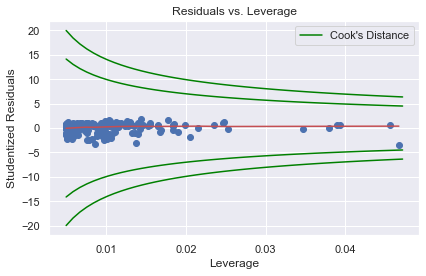

In [18]:
# Plotting Residuals vs. Leverage
std_residuals=pd.Series(lr_sm.get_influence().resid_studentized_internal)
std_residuals.index=lr_sm.resid.index
df_leverge=pd.DataFrame(std_residuals)
df_leverge.columns=['residuals']
df_leverge['leverge']=lr_sm.get_influence().hat_matrix_diag
smoothed=lowess(df_leverge['residuals'],df_leverge['leverge'])

sorted_std_residuals=abs(df_leverge['residuals']).sort_values(ascending=False)


fig, ax =plt.subplots()
x=df_leverge['leverge']
y=df_leverge['residuals']

ax.scatter(x,y)
ax.plot(smoothed[:,0],smoothed[:,1],color='r')

ax.set_ylabel('Studentized Residuals')
ax.set_xlabel('Leverage')
ax.set_title('Residuals vs. Leverage')
plt.tight_layout()

xpos=max(x)+max(x)*0.01
cooksx=np.linspace(min(x),xpos,50)
p=len(lr_sm.params)
pos_cooks1y=np.sqrt((p*(1-cooksx))/cooksx)
pos_cooks05y=np.sqrt(0.5*(p*(1-cooksx))/cooksx)
neg_cooks1y=-np.sqrt((p*(1-cooksx))/cooksx)
neg_cooks05y=-np.sqrt(0.5*(p*(1-cooksx))/cooksx)

ax.plot(cooksx,pos_cooks1y,label="Cook's Distance",color='green')
ax.plot(cooksx,pos_cooks05y,color='green')
ax.plot(cooksx,neg_cooks1y,color='green')
ax.plot(cooksx,neg_cooks05y,color='green')
ax.legend()
plt.show()

Testing to see for points that have high leverage and have high influence on the models.<br>
In other words, we are looking for extreme values that are pulling/influencing your model to one direction.<br>
Outliers could influence the direction of the model.<br>
In our model we dont see any of the points that exceeds the Cook's distance line, otherwise you want to re-check these observations with the SME.

### 1.2 Linear Regression: Statistical Assumptions
Linear regression have assumptions that has to be met.
- __Linearity__: There should be linear relationship between DV and IV. If there is a relation but not normal, use diff. model.
- __Normality__: Independent variables and residuals should be normally distributed.
- __Multicollineraity__: Independent variables should not be highly colerated. (For Multlinear Regression)
- __Auto-correlation__: Residuals should be independent from one another. (If residuals are relying on one another, then we will have bias)
- __Homoscedasticity__: Residuals should be equal across the calculated regression line. (Make sure we dont have peaks across the line, make sure no bias)

#### Checking Linearity Assumption

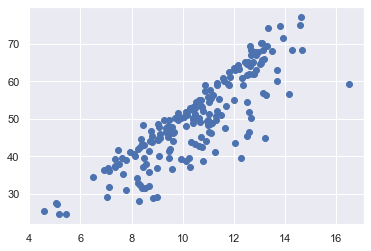

In [21]:
# Is there a linear relationship (DV and IV) ?
plt.scatter(x='Porosity (%)',
               y='Aroot(K)',
               data=df)
plt.show()

#### Checking Normality Assumption
Using Shapiro-Wilk test or QQplot and histograms are used to visually inspect the normality.

In [24]:
from scipy.stats import shapiro
stat, pvalue=shapiro(df['Porosity (%)'])
print('Shapiro Statistic =', stat)
print('p-value =',pvalue)

Shapiro Statistic = 0.9904102087020874
p-value = 0.20496273040771484


Shapiro-Wilk's test is statistically not significant, suggesting that there is __NO__ significant departure from normality (_normally distributed_).

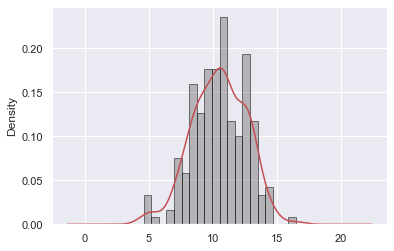

In [26]:
import math
from scipy.stats import norm

df['Porosity (%)'].plot.hist(alpha=0.5, bins=20, grid=True, legend=None, density=True, color='gray', edgecolor='black')
df['Porosity (%)'].plot(kind = 'kde',color='r')

plt.show()

C:\Users\mibra\Anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


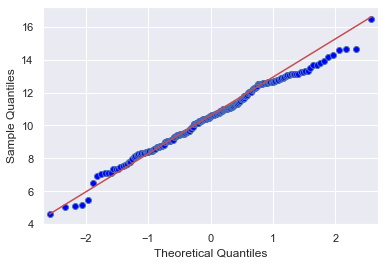

In [27]:
from statsmodels.graphics.gofplots import qqplot

qqplot(df['Porosity (%)'],line='q')
plt.show()

#### Checking Normality Assumption for Residuals
Using Shapiro-Wilk test or QQplot and histograms are used to visually inspect the normality.

Shapiro Statistic = 0.913855254650116
p-value = 2.1123431892533517e-09


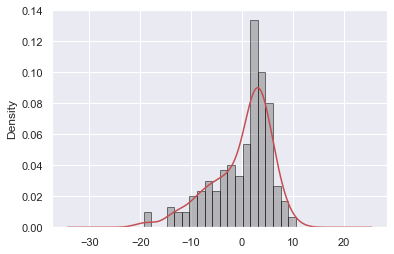

C:\Users\mibra\Anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


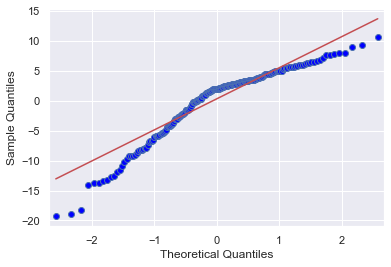

In [30]:
stat, pvalue=shapiro(residuals)
print('Shapiro Statistic =', stat)
print('p-value =',pvalue)

residuals.plot.hist(alpha=0.5, bins=20, grid=True, legend=None, density=True, color='gray', edgecolor='black')
residuals.plot(kind = 'kde',color='r')

plt.show()

qqplot(residuals,line='q')
plt.show()

Shapiro-Wilk's test is statistically  significant, suggesting that there is significant departure from normality (Residuals are Not normally distributed).

#### Checking Multicollinearity Assumption
Residuals should be independent from one another. (If residuals are relying on one another, then we will have bias)

In [39]:
df_corr=pd.DataFrame(df,columns=['Porosity (%)', 'Matrix Perm (nd)', 'Acoustic impedance (kg/m2s*10^6)',
       'Brittleness Ratio', 'TOC (%)', 'Vitrinite Reflectance (%)'])
corr_matrix=df_corr.corr()
corr_matrix
#poristy and matrix perm are highly correlated but not perfectly correlated. So it is okay here

,Porosity (%),Matrix Perm (nd),Acoustic impedance (kg/m2s*10^6),Brittleness Ratio,TOC (%),Vitrinite Reflectance (%)
Porosity (%),1.000000,0.760546,-0.461549,-0.218570,0.710718,0.111860
Matrix Perm (nd),0.760546,1.000000,-0.239636,-0.124017,0.472598,0.051023
Acoustic impedance (kg/m2s*10^6),-0.461549,-0.239636,1.000000,0.127599,-0.529581,0.499143
Brittleness Ratio,-0.218570,-0.124017,0.127599,1.000000,-0.212520,0.317929
TOC (%),0.710718,0.472598,-0.529581,-0.212520,1.000000,0.300523
Vitrinite Reflectance (%),0.111860,0.051023,0.499143,0.317929,0.300523,1.000000


In [56]:
# Calcualte Variance Inflation Factor (VIF) 
#VIF> 10 indicates multicollinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

df_ = df.rename(columns={'Porosity (%)': 'Porosity', 
                        'Matrix Perm (nd)': 'Matrix_Perm', 
                        'Acoustic impedance (kg/m2s*10^6)': 'Acoustic_impedance', 
                        'Brittleness Ratio': 'Brittleness_Ratio', 
                        'TOC (%)': 'TOC', 
                        'Vitrinite Reflectance (%)': 'Vitrinite_Reflectance',
                        'Aroot(K)':'ArootK'})


# get y and X dataframes based on this regression:
y, X = dmatrices(formula_like="ArootK ~ Porosity+ Matrix_Perm+ Acoustic_impedance+Brittleness_Ratio+ TOC+ Vitrinite_Reflectance", data=df_, return_type='dataframe')

# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

In [57]:
vif.round(1)

,VIF Factor,features
0,161.7,Intercept
1,4.3,Porosity
2,2.9,Matrix_Perm
3,7.5,Acoustic_impedance
4,2.1,Brittleness_Ratio
5,7.2,TOC
6,6.9,Vitrinite_Reflectance


No multicollinearity observed and we are okay to proceed with the IVs we have. 

#### Checking Autocorrelation Assumption
Residuals should be independent from one another. (If residuals are relying on one another, then we will have bias)
Using Durbin Watson Test to test if the residuals are correlated
Any value between 1.5 to 2.5 is acceptable for the Durbin Watson Test  and indicates no autocorrelation.

In [60]:
from statsmodels.stats.stattools import durbin_watson

#perform Durbin-Watson test
durbin_watson(lr_sm.resid)

1.9313300676410123

#### Checking Homoscedasticity Assumption
Residuals should be equal across the calculated regression line. (Make sure we dont have peaks across the line, make sure no bias)
We dont want to see pattern on the regression line. 

Below is an exmple of heteroscedasticity where as x gets larger the error increases (residuals increase). This is a pattern
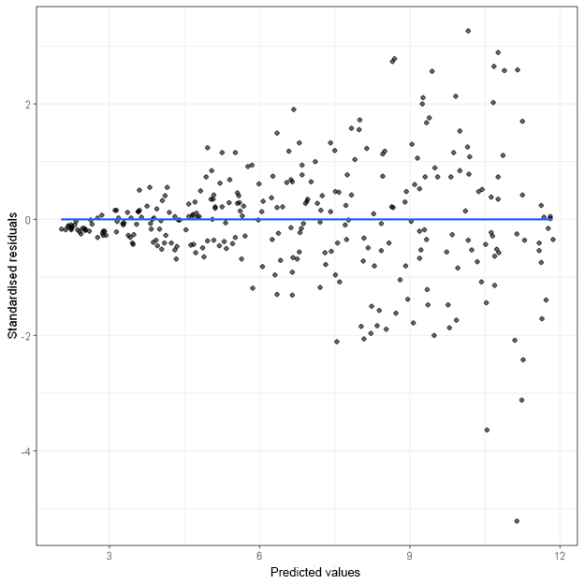

## 1.3 Comparitive Study of Linear Regression Models


### How to fix Overfitting?


For simple ML methods, there are two options to fix the issue of overfitting:

- Reduce the number of features - Feature Selection

- Regularization discourages the complexity of the model.


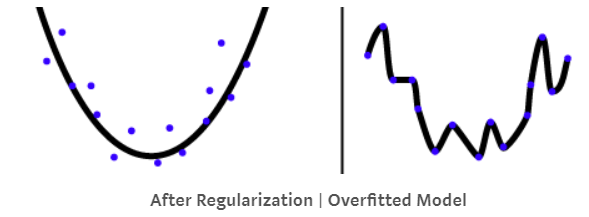


https://medium.com/data-science-group-iitr/regularization-a-smooth-trick-to-increase-robustness-of-regression-models-a5e8a91737ff



#### Benefits of Feature Selection

> If two or more of the independent variables (or predictors) are correlated to the dependent (or predicted) variable, then the estimates of coefficients in a regression model tend to be unstable or counter intuitive.


##### Overfitting leads to large errors during the testing phase
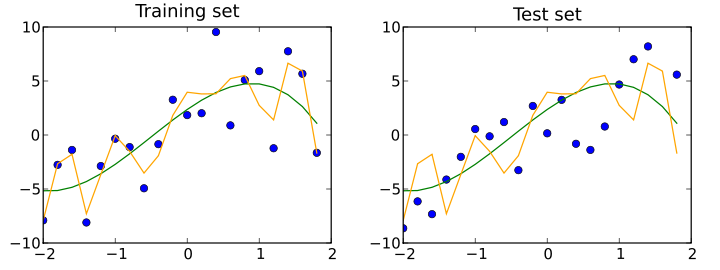
https://commons.wikimedia.org/wiki/File:Traintest.svg

The relationship between the target variable (y) and the feature variable (x) is defined as
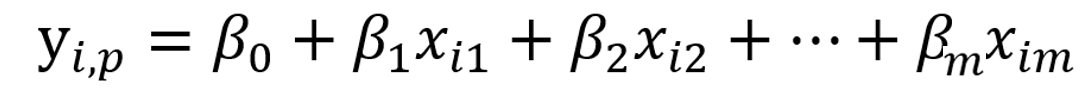

> number of features = m

> number of samples in the training dataset = n

> index for any sample = i

> p denotes predicted values

### Cost Functions

In order to find the best model, the common method in machine learning is to define a loss or cost function that describes how well the model fits the data. 

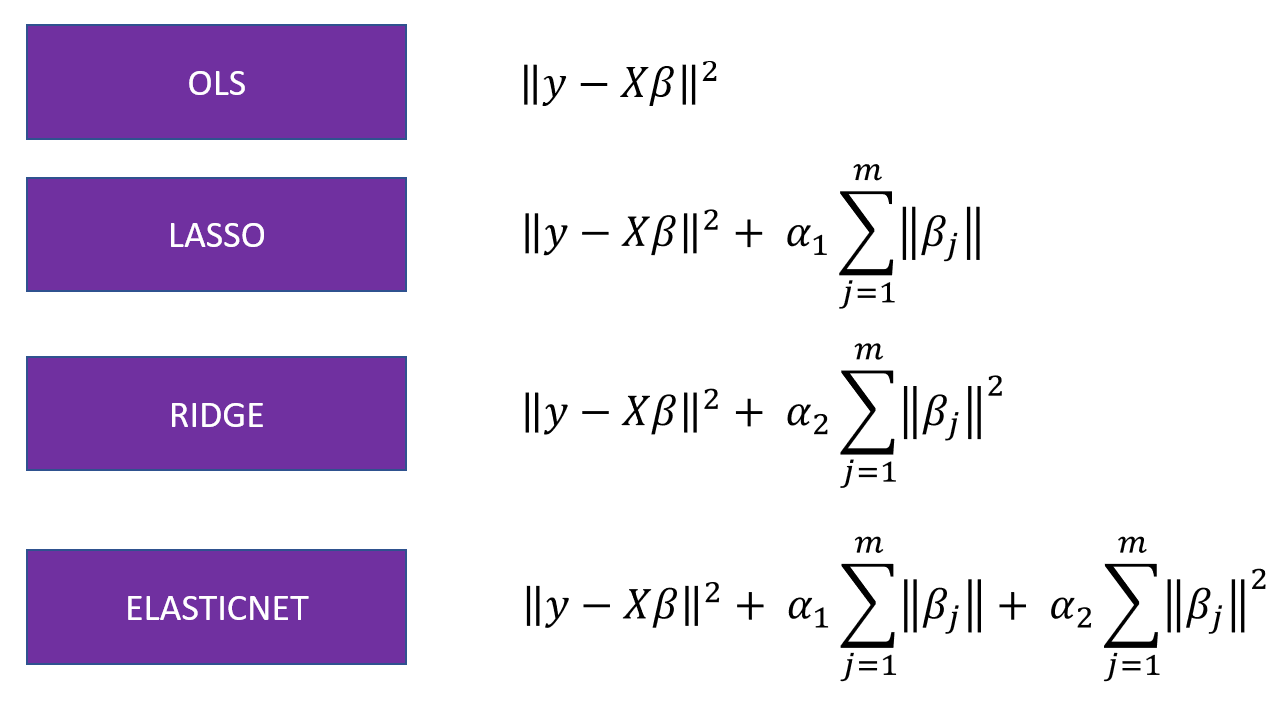
http://www.databaser.net/moniwiki/wiki.php/Python-LinearRegression

### L1 vs. L2 Regularization --- LASSO vs.  Ridge

When minimizing a loss function with a regularization term, each of the entries in the parameter vector are “pulled” down towards zero. <br>
L1 Loss function stands for Least Absolute Deviations. Also known as LAD.<br>
L2 Loss function stands for Least Square Errors. Also known as LS.

### L2 Regularization

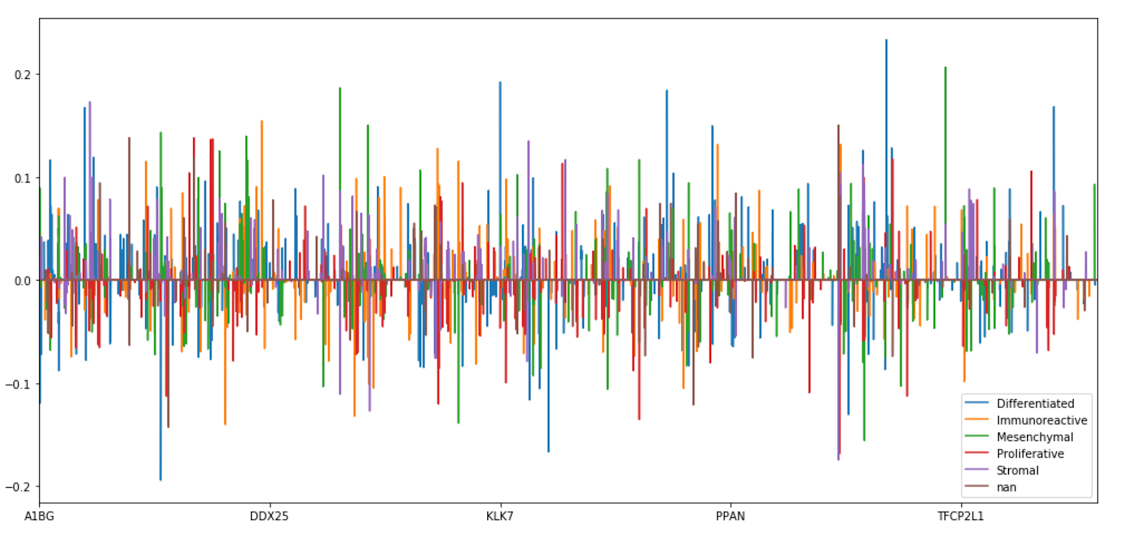

### L1 Regularization

This is the power of L1-regularization for interpretability.
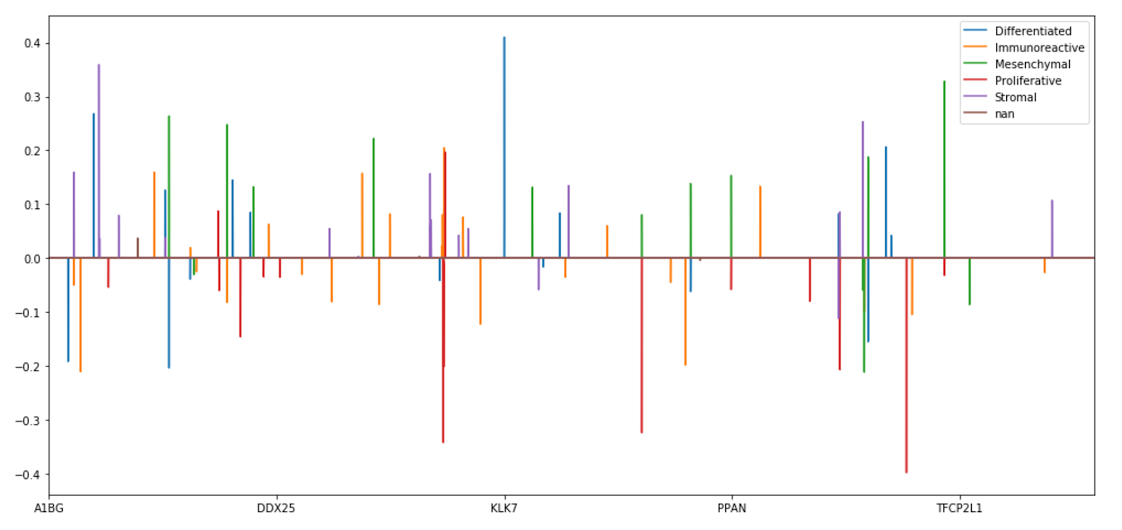

In [61]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

# small data set with lot of uncessary features (20 uninformative features)

X, y, true_coefficient = make_regression(n_samples=200, n_features=30, n_informative=10, noise=100, coef=True, random_state=5)

### 1.3.1 Ordinary Least Squares (OLS)
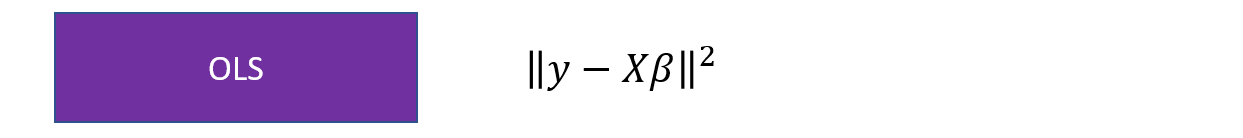

In [63]:
#### training with small training dataset size
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5, train_size=60)


print(X_train.shape)
print(X_test.shape)

(60, 30)
(140, 30)


In [64]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression().fit(X_train, y_train)
print("R^2 on training set: %f" % linear_reg.score(X_train, y_train))
print("R^2 on test set: %f" % linear_reg.score(X_test, y_test))

R^2 on training set: 0.878011
R^2 on test set: 0.216332


Why is there such a large difference between training and testing performance? <br>
Linear Model needs train set size >> features

#### training with larger training dataset size

In [66]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y, random_state=5, train_size=140, test_size=60)

In [67]:
linear_reg = LinearRegression().fit(X1_train, y1_train)
print("R^2 on training set: %f" % linear_reg.score(X1_train, y1_train))
print("R^2 on test set: %f" % linear_reg.score(X1_test, y1_test))

## performance improves

R^2 on training set: 0.752491
R^2 on test set: 0.722270


## 4.2 Ridge Regularization


- L2 penalty to reduce number of features



-  When Alpha = 0 is OLS



- Alpha controls complexity of the model



-  Too much alpha causes underfitting, lot of features are dropped



- Too less alpha causes overfitting

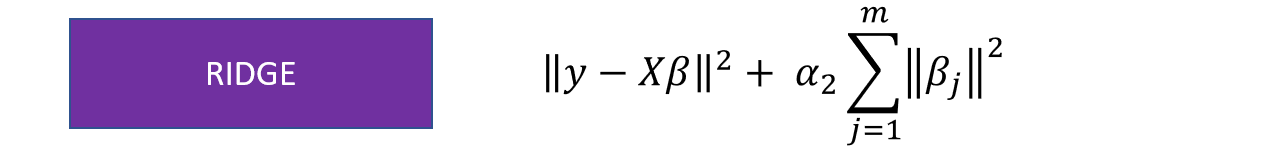

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5, train_size=60)

## compare train size 60 vs 140

print(X_train.shape)
print(y_train.shape)

(60, 30)
(60,)


Text(0.5, 0, 'alpha')

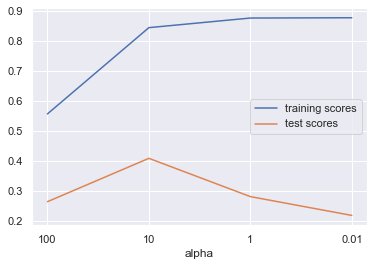

In [70]:
from sklearn.linear_model import Ridge
ridge_models = {}
training_scores = []
test_scores = []

for alpha in [100, 10, 1, .01]:
    ridge = Ridge(alpha=alpha).fit(X_train, y_train)
    training_scores.append(ridge.score(X_train, y_train))
    test_scores.append(ridge.score(X_test, y_test))
    ridge_models[alpha] = ridge

plt.figure()
plt.plot(training_scores, label="training scores")
plt.plot(test_scores, label="test scores")
plt.xticks(range(4), [100, 10, 1, .01])
plt.legend(loc="best")
plt.xlabel("alpha")

- When alpha is large, several coefficients are pulled down to zero resulting in a underfitted model that exhibits low training and testing performances.

- When alpha is small, most features are used to build the model resulting in a overfitted model that exhibits high training and low testing performances.

- Alpha is the hyperparameter. there is a sweet spot between large and small values of alpha

- for large training set, a small alpha is required to build a generalizable model... i.e. use OLS ..dont use regularization  

- for small training set, a large alpha is required to build a generalizable model... i.e. use ridge or lasso  

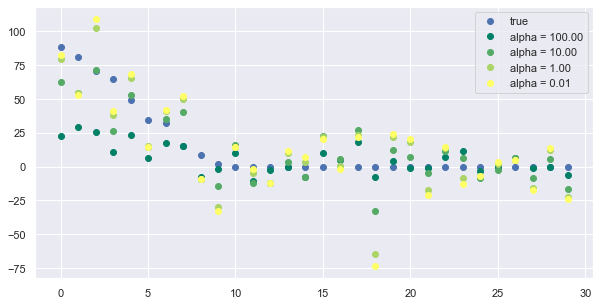

In [71]:

coefficient_sorting = np.argsort(true_coefficient)[::-1]
plt.figure(figsize=(10, 5))
plt.plot(true_coefficient[coefficient_sorting], "o", label="true", c='b')

for i, alpha in enumerate([100, 10, 1, .01]):
    plt.plot(ridge_models[alpha].coef_[coefficient_sorting], "o", label="alpha = %.2f" % alpha, c=plt.cm.summer(i / 3.))
    
plt.legend(loc="best")


- for large alpha = 100, coefficients are pushed to zero and the model is biased towards dominant features


- Major advantage of ridge regression is coefficient shrinkage and reducing model complexity while ensuring lower model non-uniqueness compared to LASSO

## 4.3 Lasso Regularization

L1 penalty to reduce number of features and can make few features go to zero 

Builds easy to understand compact models

Lasso provides sparse solutions, it is generally the model of choice (or some variant of this concept) for modelling cases where the features are in millions or more. In such a case, getting a sparse solution is of great computational advantage as the features with zero coefficients can simply be ignored.
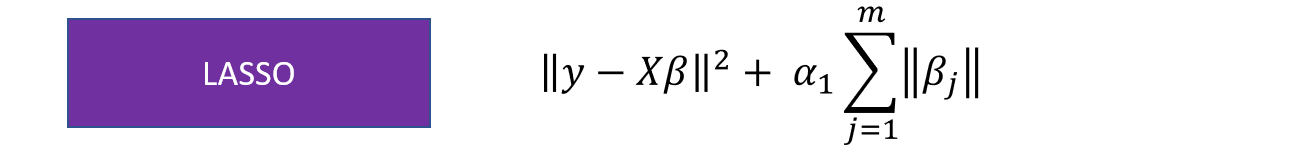

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5, train_size=60)


print(X_train.shape)
print(y_train.shape)

(60, 30)
(60,)


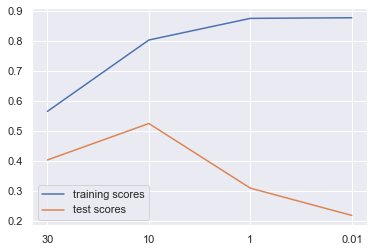

In [73]:
from sklearn.linear_model import Lasso

lasso_models = {}
training_scores = []
test_scores = []

for alpha in [30, 10, 1, .01]:
    lasso = Lasso(alpha=alpha).fit(X_train, y_train)
    training_scores.append(lasso.score(X_train, y_train))
    test_scores.append(lasso.score(X_test, y_test))
    lasso_models[alpha] = lasso
plt.figure()
plt.plot(training_scores, label="training scores")
plt.plot(test_scores, label="test scores")
plt.xticks(range(4), [30, 10, 1, .01])
plt.legend(loc="best")

- As alpha go close to zero, model overfits

- For large values of alpha, model underfits, i.e. poor performances on both training and testing datasets

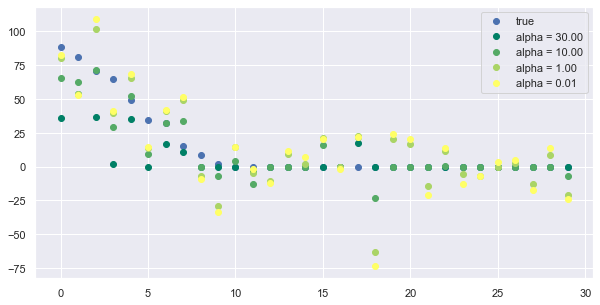

In [74]:
plt.figure(figsize=(10, 5))
plt.plot(true_coefficient[coefficient_sorting], "o", label="true", c='b')

for i, alpha in enumerate([30, 10, 1, .01]):
    plt.plot(lasso_models[alpha].coef_[coefficient_sorting], "o", label="alpha = %.2f" % alpha, c=plt.cm.summer(i / 3.))
    
plt.legend(loc="best")

- Several coefficients have been forced to zero when alpha goes to large values.
- Along with shrinking coefficients, lasso performs feature selection as well. Some of the coefficients become exactly zero, which is equivalent to the particular feature being excluded from the model.